In [10]:
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
agua = pd.read_csv("data_consumo_agua.csv")

alcaldía vs índice_des
consumo_total_dom vs bimestre
consumo_total_no_dom
indice_des vs bimestre

In [8]:
agua.head(1)

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,159.72,2019,Gustavo A. Madero,42.566364,468.23,gustavo a. madero,7 de noviembre,53.24,631.0,42.066667,3.05,3,3.05,57250,alto,19.45526,-99.112662


In [52]:
dom_no = pd.DataFrame(agua,columns=['alcaldia','consumo_total_dom','consumo_total_no_dom'])\
.groupby(['alcaldia'], as_index=False).sum()\
.sort_values(by=['consumo_total_dom'], ascending=False)\
.melt(id_vars='alcaldia')\


<AxesSubplot:xlabel='value', ylabel='alcaldia'>

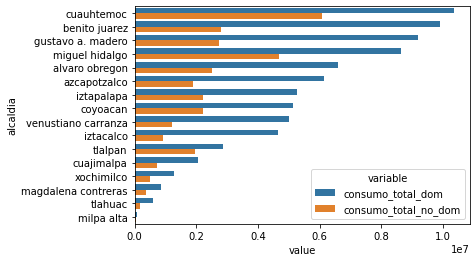

In [53]:
sns.barplot(x="value", y="alcaldia", data=dom_no, hue = 'variable')

In [10]:
consumo_ind = agua.groupby(['consumo_total','indice_des'], as_index=False)

In [78]:
ind_alcaldia = pd.DataFrame(agua, columns=['alcaldia','consumo_total','indice_des'])\
.groupby(['alcaldia','indice_des'], as_index=False).sum()\
.sort_values(by=['consumo_total'], ascending=False)
ind_alcaldia

,alcaldia,indice_des,consumo_total
8,benito juarez,alto,8053473.75
40,miguel hidalgo,alto,7828405.06
21,cuauhtemoc,bajo,6430251.23
5,azcapotzalco,bajo,6119398.30
25,gustavo a. madero,bajo,5839095.84
...,...,...,...
44,milpa alta,bajo,47414.48
47,tlahuac,alto,44911.35
32,iztapalapa,alto,44178.68
45,milpa alta,medio,35692.69


<AxesSubplot:xlabel='consumo_total', ylabel='alcaldia'>

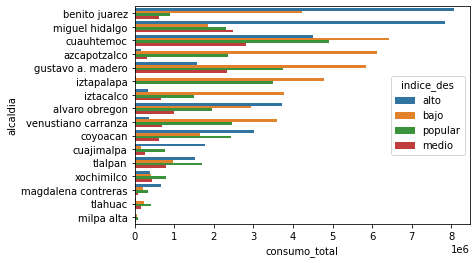

In [80]:
sns.barplot(x="consumo_total", y="alcaldia", data=ind_alcaldia, hue = 'indice_des')


In [106]:
ind_alcaldia2 = agua.groupby(['alcaldia','indice_des'], as_index=False)['consumo_total'].sum()\
.rename(columns={'consumo_total':'count'}).sort_values(by=['count'])

In [107]:
ind_alcaldia2

,alcaldia,indice_des,count
34,IZTAPALAPA,MEDIO,226.68
45,MILPA ALTA,MEDIO,35692.69
32,IZTAPALAPA,ALTO,44178.68
47,TLAHUAC,ALTO,44911.35
44,MILPA ALTA,BAJO,47414.48
...,...,...,...
25,GUSTAVO A. MADERO,BAJO,5839095.84
5,AZCAPOTZALCO,BAJO,6119398.30
21,CUAUHTEMOC,BAJO,6430251.23
40,MIGUEL HIDALGO,ALTO,7828405.06


<AxesSubplot:xlabel='count', ylabel='indice_des'>

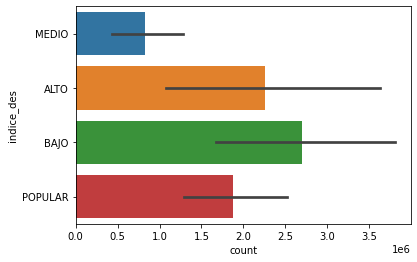

In [108]:
sns.barplot(x="count", y="indice_des", data=ind_alcaldia2)